In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
!pip install pydicom

In [25]:
import os
import pydicom
import matplotlib.pyplot as plt

In [26]:
path_roi = "/content/drive/MyDrive/Colab Notebooks/Pulmonary Fibrosis/term2/HUG-data/ILD_DB_txtROIs/"

In [27]:
def load_ROI_files(ROI_file_name):
    ROIs = []
    with open(ROI_file_name, 'r') as fid:
        i = 0
        while True:
            tline = fid.readline()
            if not tline:
                break

            if 'SpacingX:' in tline:
                spacing_x = float(tline.replace('SpacingX: ', ''))
            elif 'SpacingY:' in tline:
                spacing_y = float(tline.replace('SpacingY: ', ''))
            elif 'label:' in tline:
                label = tline.replace('label: ', '').strip()
            elif 'slice_number:' in tline:
                slice_number = int(tline.replace('slice_number: ', ''))
            elif 'nb_points_on_contour:' in tline:
                nb_points_on_contour = int(tline.replace('nb_points_on_contour: ', ''))
                x_values = []
                y_values = []
                for j in range(nb_points_on_contour):
                    tline = fid.readline()
                    x_val_str, y_val_str = tline.split(' ')
                    x_val = float(x_val_str)
                    y_val = float(y_val_str)
                    x_values.append(x_val)
                    y_values.append(y_val)
                # store the ROI into the list "ROIs"
                ROIs.append({
                    'spacing_x': spacing_x,
                    'spacing_y': spacing_y,
                    'label': label,
                    'slice_number': slice_number,
                    'x_values': x_values,
                    'y_values': y_values
                })
                i += 1
    return ROIs


In [28]:
directories = os.listdir(path_roi)
remove_elements = ['HRCT_pilot','171','172','173','174','175','177','179','182','183','184','185']
for i in remove_elements:
  directories.remove(i)


In [29]:
def file_exist(path,counter = 0):
  if os.path.exists(path + '-' + str(counter) + ".dcm"):
    counter +=1
    return file_exist(path,counter)
  else:
    return counter

In [30]:
labels = ['ground_glass','fibrosis','micronodules','consolidation','healthy', 'emphysema','reticulation' ]

In [31]:
for i in labels:
  os.makedirs("/content/drive/MyDrive/Colab Notebooks/Pulmonary Fibrosis/term2/data/" + i)

In [32]:
import shutil
def copy_rois(rois, txt_file,folder):
  splitz = str.split(txt_file, '.')
  id_of_patient = str.split(splitz[0],'-')[-1]
  stringx = 'CT-' + id_of_patient + '-'
  for roi in rois:

    label = roi['label']
    if label in labels:
      slice_number = roi['slice_number']
      dcm_file = ""
      if slice_number//10 == 0:
        dcm_file = stringx + "000" + str(slice_number)
      elif 10 > slice_number//10 > 0:
        dcm_file = stringx + "00" + str(slice_number)
      elif 10 <= slice_number//10:
        dcm_file = stringx + "0" + str(slice_number)

      if folder == "":
        counter = file_exist( '/content/drive/MyDrive/Colab Notebooks/Pulmonary Fibrosis/term2/data/' + label + '/' + patient + '-' + dcm_file)
        shutil.copyfile(path_roi + patient + '/' +  dcm_file + '.dcm', '/content/drive/MyDrive/Colab Notebooks/Pulmonary Fibrosis/term2/data/' + label + '/' + patient + '-' + dcm_file + '-' + str(counter) + '.dcm' )
      else:
        counter = file_exist( '/content/drive/MyDrive/Colab Notebooks/Pulmonary Fibrosis/term2/data/' + label + '/' + patient + '-' + folder + '-' + dcm_file)
        shutil.copyfile(path_roi + patient + '/' + folder + "/" + dcm_file + '.dcm',  '/content/drive/MyDrive/Colab Notebooks/Pulmonary Fibrosis/term2/data/' +  label + '/' + patient + '-' + folder + '-' + dcm_file + '-' + str(counter) + '.dcm' )


In [33]:
for patient in directories:
  files = os.listdir(path_roi + patient)
  txts = []
  folders = []
  for filex in files:
    if filex.endswith('.txt'):
      txts.append(filex)
    elif filex.endswith('.dcm'):
      continue
    else:
      folders.append(filex)
  if txts==[]:
    for folder in folders:
      files = os.listdir(path_roi + patient + "/" + folder)
      txts = []
      folders = []
      for filex in files:
        if filex.endswith('.txt'):
          txts.append(filex)
        elif filex.endswith('.dcm'):
          continue
        else:
          folders.append(filex)
    txt_file_path = path_roi + patient + '/' + folder + '/' + txts[0]
    rois = load_ROI_files(txt_file_path)
    copy_rois(rois,txts[0],folder)
  else:
    txt_file_path = path_roi + patient + '/' + txts[0]
    rois = load_ROI_files(txt_file_path)
    copy_rois(rois,txts[0],"")


In [40]:
copy0 = '/content/drive/MyDrive/Colab Notebooks/Pulmonary Fibrosis/term2/data/reticulation/107-CT-3684-0014-0.dcm'
copy1 = '/content/drive/MyDrive/Colab Notebooks/Pulmonary Fibrosis/term2/data/reticulation/107-CT-3684-0014-1.dcm'
copy2 = '/content/drive/MyDrive/Colab Notebooks/Pulmonary Fibrosis/term2/data/reticulation/107-CT-3684-0014-2.dcm'


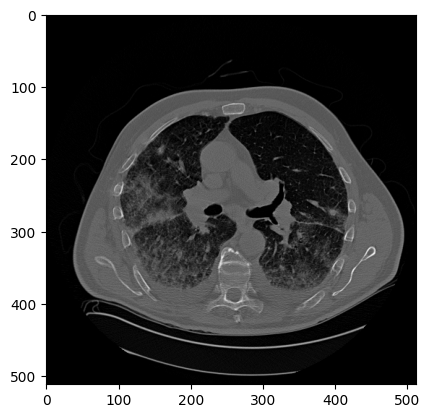

In [41]:
ds = pydicom.dcmread(copy0)
pixel_data = ds.pixel_array

plt.imshow(pixel_data, cmap=plt.cm.gray)
plt.show()

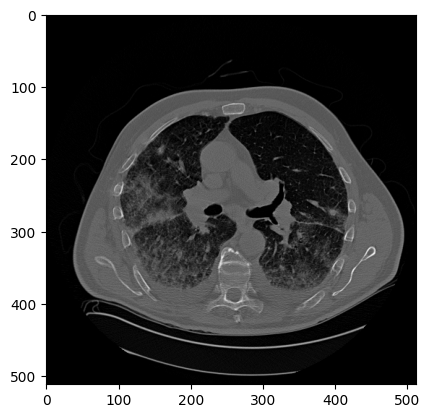

In [42]:
ds = pydicom.dcmread(copy1)
pixel_data = ds.pixel_array

plt.imshow(pixel_data, cmap=plt.cm.gray)
plt.show()

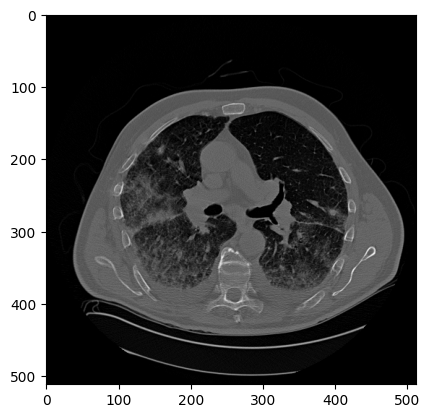

In [43]:
ds = pydicom.dcmread(copy2)
pixel_data = ds.pixel_array

plt.imshow(pixel_data, cmap=plt.cm.gray)
plt.show()